In [21]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
scaler = StandardScaler()

# Part one

In [23]:
df = pd.read_csv('Student_Score.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [25]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [27]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [28]:
df['Extracurricular Activities'].value_counts()

0    5052
1    4948
Name: Extracurricular Activities, dtype: int64

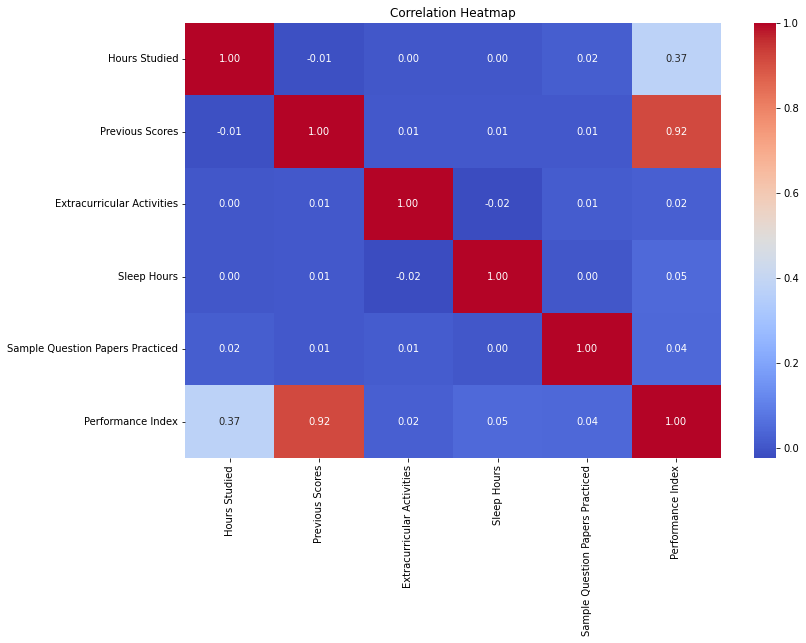

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

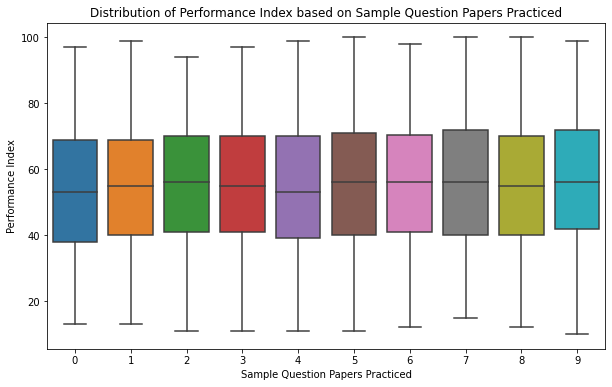

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sample Question Papers Practiced', y='Performance Index', data=df)
plt.title('Distribution of Performance Index based on Sample Question Papers Practiced')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

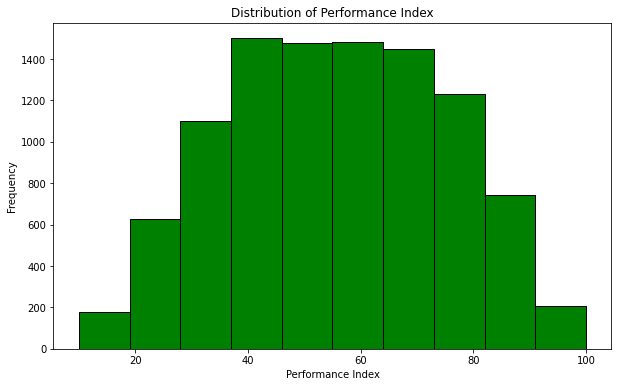

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['Performance Index'], bins=10, color='green', edgecolor='black')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Index')
plt.show()

In [32]:
df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']] = scaler.fit_transform(df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91.0
1,-0.383481,0.723913,0,-1.492294,-0.900982,65.0
2,1.161410,-1.063626,1,0.276805,-0.900982,45.0
3,0.002742,-1.005963,1,-0.902594,-0.900982,36.0
4,0.775188,0.320275,0,0.866505,0.145333,66.0
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1,-1.492294,-0.900982,23.0
9996,0.775188,-0.314013,1,0.866505,0.145333,58.0
9997,0.388965,0.781575,1,0.866505,0.145333,74.0
9998,1.547633,1.588851,1,0.276805,-1.598526,95.0


In [33]:
X = torch.tensor(df.drop('Performance Index', axis=1).values, dtype=torch.float)
y = torch.tensor(df['Performance Index'].values, dtype=torch.float)


X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size=0.7, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_remain, y_remain, test_size=1/3, random_state=42)

In [34]:
class Mnn(nn.Module):
    def __init__(self, input_size, hidden_neurons, output_size):
        super(Mnn, self).__init__()

        self.sequential_model = nn.Sequential(
            nn.Linear(input_size, hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, output_size),
            nn.LeakyReLU()
        )

    def forward(self, x):
        return self.sequential_model(x)

In [35]:
Model = Mnn(input_size=X.shape[1], hidden_neurons=10, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)


loss function quantifies how 'wrong' our model is, the optimizer tries to minimize this error by changing the parameters of the model.

the loss function is a crucial component in evaluating the performance of a model, while the optimizer's role is to adjust the model's parameters to minimize this loss function, leading to a model that performs better on the task it is trained for.

some optimizer example:

        Stochastic Gradient Descent (SGD)
        SGDMomentum
        AdaGrad
        RMSprop
        Adam

some loss function example:

        MSE
        MAE
        Binary Cross-Entropy
        Categorical Cross-Entropy

In [36]:
num_iterations = 500000
eval_losses = []; train_losses = [] 
threshold = 1000
best_loss = torch.inf

In [37]:
for epoch in range(num_iterations):
    
    py = Model(X_train).squeeze()
    train_loss = criterion(py, y_train)
    train_losses.append(train_loss.item())

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()


    with torch.no_grad():
            py_eval = Model(X_eval).squeeze()
            eval_loss = criterion(py_eval, y_eval)
            eval_losses.append(eval_loss.item())


    if eval_loss < best_loss:
        best_loss = eval_loss
        no_improvement_counter = 0
    else:
        no_improvement_counter += 1

    if no_improvement_counter >= threshold:
        print(100*'#')
        print(f'Validation loss did not improve for {threshold} iterations.') 
        print(f'Stopping training in Iteration {epoch} with Validation Loss: {eval_loss}')
        break

    if epoch % 500 == 0:
        print(f'Iteration {epoch}, Training Loss: {train_loss}, Validation Loss: {eval_loss}')
print(100*'-')
print(f'The last result from training loss: {train_loss}')
print(f'best validation loss: {best_loss}')

Iteration 0, Training Loss: 3428.072509765625, Validation Loss: 3327.60791015625
Iteration 500, Training Loss: 5.651580333709717, Validation Loss: 5.658573150634766
Iteration 1000, Training Loss: 4.248188018798828, Validation Loss: 4.1508917808532715
Iteration 1500, Training Loss: 4.195723056793213, Validation Loss: 4.096301078796387
Iteration 2000, Training Loss: 4.189993858337402, Validation Loss: 4.082094192504883
Iteration 2500, Training Loss: 4.188174724578857, Validation Loss: 4.0791850090026855
Iteration 3000, Training Loss: 4.186950206756592, Validation Loss: 4.078261852264404
Iteration 3500, Training Loss: 4.18609094619751, Validation Loss: 4.076147079467773
Iteration 4000, Training Loss: 4.1856255531311035, Validation Loss: 4.074533462524414
Iteration 4500, Training Loss: 4.185146808624268, Validation Loss: 4.074112892150879
Iteration 5000, Training Loss: 4.184688568115234, Validation Loss: 4.074234962463379
Iteration 5500, Training Loss: 4.184157848358154, Validation Loss: 4

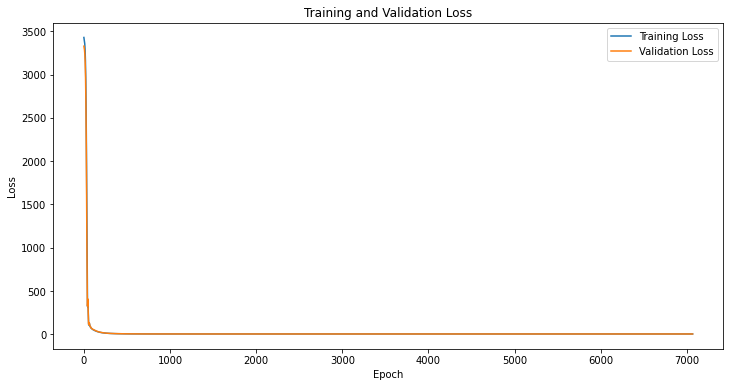

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(eval_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [39]:
def Calculate_accuracy(y_true, y_pred):
    mean_y_true = torch.mean(y_true)
    t = torch.sum((y_true - mean_y_true)**2)
    r = torch.sum((y_true - y_pred)**2)
    return 1 - r / t

In [40]:
with torch.no_grad():
    predictions = Model(X_test).squeeze()
    loss = criterion(predictions, y_test)
    r2score = Calculate_accuracy(y_test, predictions)

print(f'mse loss: {loss.item()}')
print(f'Accuracy of my model is: {r2score.item()*100:.3f}%')


mse loss: 4.116881847381592
Accuracy of my model is: 98.853%
